<a href="https://www.kaggle.com/concyclics/people-s-daily-wordcloud-visualization?scriptVersionId=89473331" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# People's Daily Keyword Cloud
#### Author: Concyclics

## 1. Load and split

### 1.1 Load newspath

In [1]:
import os

newspath=[]
for dirname, _, filenames in os.walk('../input/renmindaily/data'):
    for filename in filenames:
        newspath.append(os.path.join(dirname, filename))

print("total news: ",len(newspath))

total news:  29038


### 1.2 Preview of news

In [2]:
from random import sample
for eachpath in sample(newspath,k=2):
    print("path: ", eachpath)
    with open(eachpath,'r') as f:
        news=f.read()
        print(news)
        print('\n\n')
    

path:  ../input/renmindaily/data/RenMin_Daily/20211115-18-02.txt

政策加力，优化乡村金融供给（财经眼·金融创新助力乡村振兴②）

　　“农政银担”机制破解融资难题——
　　贷款线上办  省心又省力
　　本报记者  曲哲涵
　　1200多吨青贮饲料陆续打包、装车、发运，长了两季庄稼的土地暂时“闲”了下来。甘冲却没得闲，开始张罗买新设备，“做化肥，咱也把‘产业链’延长！”
　　近年来，山东省滨州市把打造畜牧水产“千亿级产业集群”作为实施乡村振兴战略的重要抓手，该市2020年畜牧及相关产业产值实现1179.98亿元。滨州市种粮大户甘冲就搭上了养殖业发展的“快车”——几年间，他陆续从当地农民手中流转了3700亩土地，种植小麦玉米，加工成青贮饲料销售。今年年初，饲料价格上涨、供不应求。收完第一季庄稼，老甘就琢磨着再增加1000亩种植面积，赶着种上第二季。
　　“除了土地租金收入，农民还可以在养殖场、农场务工，大家乐意流转土地。租到地不难，难在我手头资金不充裕。”老甘说，种1000亩地的租金、机械费、作业费，林林总总粗算下来，需要300万元，得贷款。
　　农时不能误，按以往办理贷款的节奏，怎么也得十天半个月。他正盘算着找熟人，山东省农业发展信贷担保有限责任公司（简称“山东农担”）的业务人员孟凡鹏敲开了农场的大门。
　　“小孟指导我在手机上下载‘山东农担’开发的贷款小程序，扫二维码后，将身份证、房产证、土地流转合同等信息一次填齐，然后提交到合作银行，一两天资金就到账了。你看，这不是跟在网上买东西一样方便嘛，一点儿都没耽误种地！”老甘说。
　　服务贴心，2.85%的低利率更让老甘喜出望外。“以前贷款利率都在7%以上，里外里又帮我省了十几万元。政府帮扶力度这么大、金融机构服务这么周到，我们有信心把地种出大名堂！”
　　想“种出大名堂”的不止甘冲这样的农户，邹平市农商行客户经理刘钊“耕耘”农村金融的心气儿也更足了。
　　山东农担上线的贷款平台，利用大数据获取申贷者贷款信用、涉诉记录、网贷逾期等一系列信息，进行风险排查。“这些措施帮助银行搭建了风险防火墙，完成预审，也节省了信贷业务成本。”刘钊说，担保机构强有力的技术支撑，极大地激发了金融机构的积极性，“我们行新开发了支农‘循环贷’，客户拿到贷款3年内可循环使用——卖了一季

### 1.3 View the split of JieBa

In [3]:
import jieba

from random import sample
for eachpath in sample(newspath,k=1):
    #print("path: ", eachpath)
    with open(eachpath,'r') as f:
        news=f.read()
        print('origin news: ')
        print(news)
        
        print('split by simple mode: ')
        print("/".join(jieba.lcut(news)))
        
        print('split by cut_all mode: ')
        print("/".join(jieba.lcut(news, cut_all=True)))
        
        print('split by search mode: ')
        print("/".join(jieba.lcut_for_search(news)))

Building prefix dict from the default dictionary ...


origin news: 

“中国是全球贸易复苏的重要贡献者”
——访国际货币基金组织亚太部副主任克里希纳·斯里尼瓦桑
　　近日，国际货币基金组织（IMF）发布最新一期《世界经济展望报告》，认为全球经济有望持续复苏但势头趋缓，中国经济增长将继续保持强劲势头。IMF亚太部副主任克里希纳·斯里尼瓦桑接受本报记者专访时表示，中国在世界经济中所占比重越来越大，“中国经济的发展带动全球增长”。
　　根据中国海关总署发布的最新数据显示，今年前三季度，中国外贸进出口继续保持较快增长，货物贸易进出口总值28.33万亿元人民币，比去年同期增长22.7%，进出口、出口和进口的国际市场份额均有提升。中国继续保持货物贸易第一大国地位。
　　“中国是全球贸易复苏的重要贡献者。”斯里尼瓦桑表示，中国的进出口表现良好，中国贸易的快速增长对全球产生了强烈的溢出效应。斯里尼瓦桑期待中国持续推进改革开放，促进经济朝着更可持续的方向发展，继续为全球经济增长作贡献。
　　中国宣布力争在2030年前实现碳达峰、2060年前实现碳中和。斯里尼瓦桑认为，中国在应对气候变化中发挥着重要作用，全国碳排放交易市场已经启动上线交易，开端良好。中国继续推进高质量发展，促使经济从投资主导型转向消费主导型，并支持服务业和高科技行业发展，这些都有利于降低碳排放。
　　IMF在《亚太地区经济展望报告》中指出，中国发展数字货币的经验可以为考虑发行央行数字货币的国家提供有益借鉴。斯里尼瓦桑表示，近年来，中国在央行数字货币研发方面做出了重大努力。数字人民币已在一些城市和地区进行测试。他认为，数字人民币具有促进普惠金融发展和提高支付效率的潜力，可以扩大支付服务的覆盖率、降低家庭和小企业的交易成本、有针对性地提供财政支持、提高公共财政的透明度等。
　　斯里尼瓦桑表示，中美之间保持顺畅的贸易关系对世界有利。他强调，中美不仅是大型经济体，还是全球供应链的主要枢纽。两国携手合作有助于国际社会共同应对新冠肺炎疫情、气候变化等紧迫挑战。
　　（本报华盛顿10月25日电）

split by simple mode: 


Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.234 seconds.
Prefix dict has been built successfully.



/“/中国/是/全球/贸易/复苏/的/重要/贡献者/”/
/—/—/访/国际货币基金组织/亚太/部副/主任/克里希纳/·/斯/里尼/瓦桑/
/　/　/近日/，/国际货币基金组织/（/IMF/）/发布/最新/一期/《/世界/经济/展望/报告/》/，/认为/全球/经济/有望/持续/复苏/但/势头/趋缓/，/中国/经济/增长/将/继续/保持/强劲/势头/。/IMF/亚太/部副/主任/克里希纳/·/斯/里尼/瓦桑/接受/本报记者/专访/时/表示/，/中国/在/世界/经济/中所/占/比重/越来越/大/，/“/中国/经济/的/发展/带动/全球/增长/”/。/
/　/　/根据/中国/海关总署/发布/的/最新/数据/显示/，/今年/前/三季度/，/中国/外贸/进出口/继续/保持/较/快/增长/，/货物贸易/进出口/总值/28.33/万亿元/人民币/，/比/去年同期/增长/22.7%/，/进出口/、/出口/和/进口/的/国际/市场份额/均/有/提升/。/中国/继续/保持/货物贸易/第一/大国/地位/。/
/　/　/“/中国/是/全球/贸易/复苏/的/重要/贡献者/。/”/斯/里尼/瓦桑/表示/，/中国/的/进出口/表现/良好/，/中国/贸易/的/快速增长/对/全球/产生/了/强烈/的/溢出/效应/。/斯/里尼/瓦桑/期待/中国/持续/推进改革/开放/，/促进/经济/朝着/更/可/持续/的/方向/发展/，/继续/为/全球/经济/增长/作贡献/。/
/　/　/中国/宣布/力争/在/2030/年前/实现/碳达峰/、/2060/年前/实现/碳中/和/。/斯/里尼/瓦桑/认为/，/中国/在/应对/气候变化/中/发挥/着/重要/作用/，/全国/碳/排放/交易市场/已经/启动/上线/交易/，/开端/良好/。/中国/继续/推进/高质量/发展/，/促使/经济/从/投资/主导型/转向/消费/主导型/，/并/支持/服务业/和/高科技/行业/发展/，/这些/都/有利于/降低/碳/排放/。/
/　/　/IMF/在/《/亚太地区/经济/展望/报告/》/中/指出/，/中国/发展/数字/货币/的/经验/可以/为/考虑/发行/央行/数字/货币/的/国家/提供/有益/借鉴/。/斯/里尼/瓦桑/表示/，/近年来/，/中国/在/央行/数字/货币/研发/方面/做出/了/重大/努力/。/数字/人民币/已/在/一些/城市/和/

### 1.4 remove space, number and punctuations

#### 1.4.1 remove before split

In [4]:
!pip install zhon

     |████████████████████████████████| 99 kB 1.0 MB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for zhon: filename=zhon-1.1.5-py3-none-any.whl size=84322 sha256=4136d88852bb53ff1a58d0b9320027efeab932d24e19145dc830fbe5e78593ee
  Stored in directory: /root/.cache/pip/wheels/d0/56/17/2675c4c7413a72bf173062e8d0a16503e3b2607745aa84988d
Successfully built zhon


In [5]:
import re
from zhon.hanzi import punctuation as puncZH
from string import punctuation as puncEN

def removeSymbols(s:str):
    s=re.sub(r"[%s]+" %puncZH, "",s)
    s=re.sub(r"[%s]+" %puncEN, "",s)
    s=re.sub(r"[\d\n\t\r]+", "",s)
    return s

In [6]:
from random import choice

news = open(choice(newspath),'r').read()
print(news)


图片报道

　　三月二十四日，佩戴口罩出行的市民从意大利首都罗马盛开的樱花树下走过。
　　新华社记者 程婷婷摄 



In [7]:
print(removeSymbols(news))

图片报道三月二十四日佩戴口罩出行的市民从意大利首都罗马盛开的樱花树下走过新华社记者 程婷婷摄 


In [8]:
print("/".join(jieba.lcut_for_search(news)))
print("/".join(jieba.lcut_for_search(removeSymbols(news))))


/图片/报道/
/
/　/　/三月/二十/十四/四日/二十四/十四日/二十四日/，/佩戴/口罩/出行/的/市民/从/大利/意大利/首都/罗马/盛开/的/樱花/花树/樱花树/下/走过/。/
/　/　/新华/新华社/记者/ /程/婷婷/摄/ /

图片/报道/三月/二十/十四/四日/二十四/十四日/二十四日/佩戴/口罩/出行/的/市民/从/大利/意大利/首都/罗马/盛开/的/樱花/花树/樱花树/下/走过/新华/新华社/记者/ /程/婷婷/摄/ 


#### 1.4.2 remove after split

In [9]:
import re
from zhon.hanzi import punctuation as puncZH
from string import punctuation as puncEN

def hasSymbols(s:str):
    f=False
    f|=bool(re.match(r"[%s]+" %puncZH, s))
    f|=bool(re.match(r"[%s]+" %puncEN, s))
    f|=bool(re.match(r"[\d\n\t\r]+", s))
    return f

In [10]:
split_news=jieba.lcut_for_search(news)
removed_split_news=[]
for text in split_news:
    if hasSymbols(text) is False:
        removed_split_news.append(text)

print("/".join(jieba.lcut_for_search(news)))
print("/".join(removed_split_news))


/图片/报道/
/
/　/　/三月/二十/十四/四日/二十四/十四日/二十四日/，/佩戴/口罩/出行/的/市民/从/大利/意大利/首都/罗马/盛开/的/樱花/花树/樱花树/下/走过/。/
/　/　/新华/新华社/记者/ /程/婷婷/摄/ /

图片/报道/三月/二十/十四/四日/二十四/十四日/二十四日/佩戴/口罩/出行/的/市民/从/大利/意大利/首都/罗马/盛开/的/樱花/花树/樱花树/下/走过/新华/新华社/记者/ /程/婷婷/摄/ 


### 1.5 using remove after split

In [11]:
def getWords(news:str):
    split_news=jieba.lcut_for_search(news)
    removed_split_news=[]
    for text in split_news:
        if hasSymbols(text) is False:
            removed_split_news.append(text)
    return removed_split_news


In [12]:
words=[]
for path in sample(newspath,k=100):
    news = open(path,'r').read()
    words += getWords(news)
    
print('total words' ,len(words))

total words 69071


## 2. Generate Wordcloud

### 2.1 count word frequency

In [13]:
word_count={}
for word in words:
    word_count[word]=word_count.get(word,0)+1
print('total unique words' ,len(word_count))

total unique words 14040


In [14]:
import pandas as pd

word_ds=pd.DataFrame(word_count,index=[0])
word_ds=word_ds.T
word_ds.columns=['count']

In [15]:
word_ds

,count
改变,13
中国,410
命运,17
的,2768
伟大,53
...,...
契约化,1
选聘,1
经理人,1
主业,1


**Too many no-meaning words here**

In [16]:
word_ds.sort_values(by=['count'],ascending=False,inplace=True)
word_ds.head(10)

,count
的,2768
在,698
和,657
了,592
中国,410
是,407
发展,393
为,338
年,312
等,289


### 2.2 remove stopwords

In [17]:
!wget https://codeload.github.com/Concyclics/stopwords/zip/refs/heads/master
!unzip master

--2022-03-07 08:20:47--  https://codeload.github.com/Concyclics/stopwords/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master’

master                  [ <=>                ]  13.87K  --.-KB/s    in 0.06s   

2022-03-07 08:20:47 (246 KB/s) - ‘master’ saved [14200]

Archive:  master
1de4e063cdc6b50d1b94392bcd2a5063b468b0be
   creating: stopwords-master/
  inflating: stopwords-master/README.md  
  inflating: stopwords-master/baidu_stopwords.txt  
  inflating: stopwords-master/cn_stopwords.txt  
  inflating: stopwords-master/hit_stopwords.txt  
  inflating: stopwords-master/scu_stopwords.txt  


In [18]:
stopwords=[]

for dirname, _, filenames in os.walk('./stopwords-master'):
    for filename in filenames:
        with open(os.path.join(dirname, filename)) as f:
            if filename.endswith('txt'):
                stopwords+=list(f.read().split())
    
stopwords.append('年')
stopwords.append('月')
stopwords.append('日')
stopwords.append('上')
stopwords.append('中')
stopwords.append('本报')
stopwords.append('\xa0')

stopwords=list(set(stopwords))
print('stopwords in total: ',len(stopwords))

stopwords in total:  2318


In [19]:
for stopword in stopwords:
    if stopword in word_count:
        word_count.pop(stopword) 

print('total unique words without stopwords' ,len(word_count))

total unique words without stopwords 13312


In [20]:
word_ds=pd.DataFrame(word_count,index=[0])
word_ds=word_ds.T
word_ds.columns=['count']

word_ds.sort_values(by=['count'],ascending=False,inplace=True)
word_ds.head(20)

,count
中国,410
发展,393
新,214
工作,193
社会,181
国家,168
人民,164
服务,163
建设,153
习近平,151


### 2.3 create wordcloud

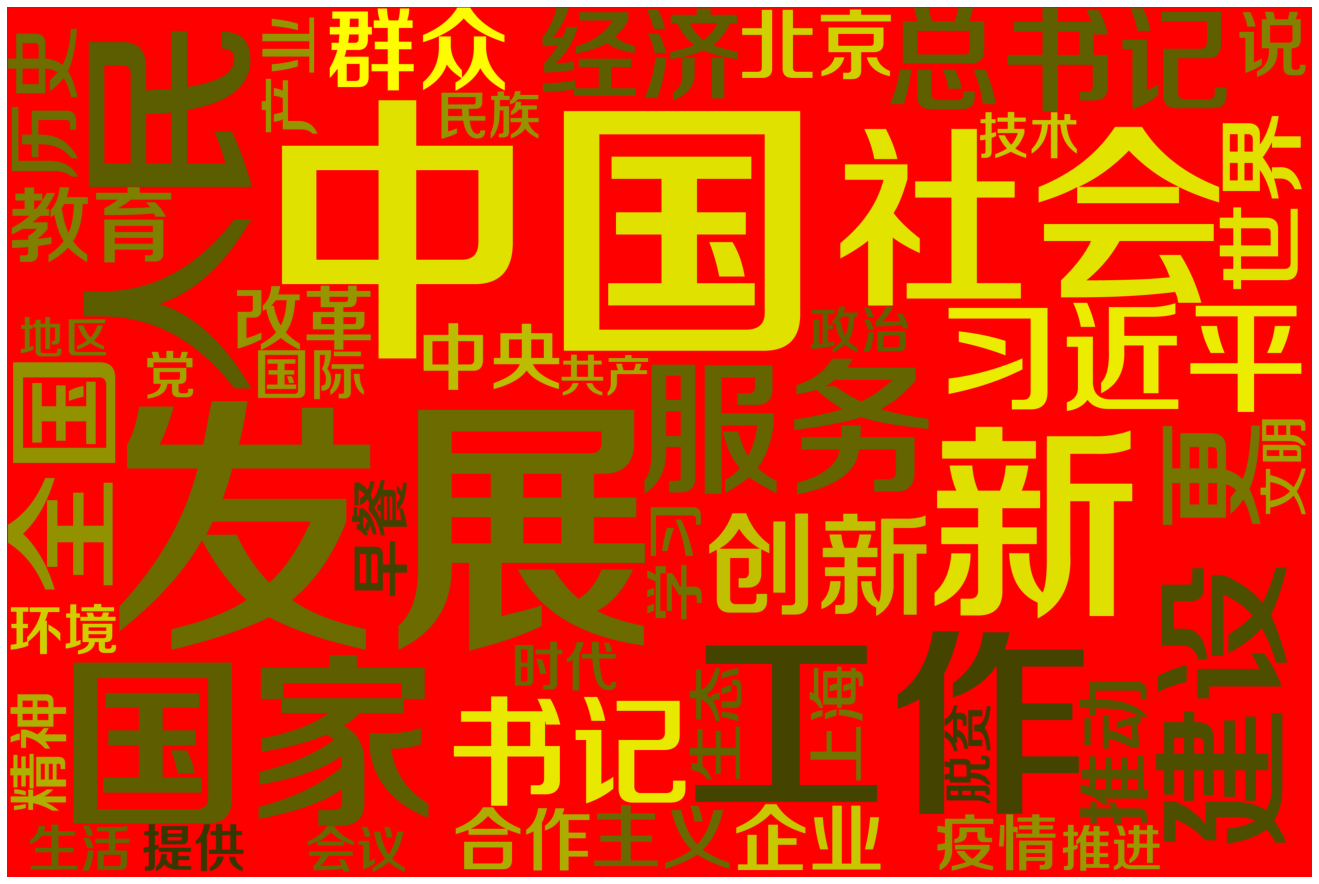

In [21]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(word_count)

wc.to_file("People's Daily WordCloud.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud.png"))
plt.axis("off")
plt.show()

### 2.4 translate to English

In [22]:
import json
import requests
import re

def translator(str):
    """
    input : str
    output：translation
    """
    # API
    url = 'http://fanyi.youdao.com/translate?smartresult=dict&smartresult=rule&smartresult=ugc&sessionFrom=null'
    key = {
        'type': "AUTO",
        'i': str,
        "doctype": "json",
        "version": "2.1",
        "keyfrom": "fanyi.web",
        "ue": "UTF-8",
        "action": "FY_BY_CLICKBUTTON",
        "typoResult": "true"
    }
    # key
    response = requests.post(url, data=key)
    if response.status_code == 200:
        
        result = json.loads(response.text)
        translation = result['translateResult'][0][0]['tgt']
        return translation
    else:
        print("failed to use 有道 API")
        return None


In [23]:
translator('英文')

'English'

In [24]:
import re
def removeElse(s:str):
    pattern=r'^The \b|^To \b|\b of$|\b of the$|\b the$|^At the\b|\b are$'
    return re.sub(pattern,"",s)


In [25]:
En_word_count={}
for word in word_ds.head(50).index:
    En_word_count[removeElse(translator(word))]=word_count[word]
 
En_word_ds=pd.DataFrame(En_word_count,index=[0])
En_word_ds=En_word_ds.T
En_word_ds.columns=['count']

En_word_ds.sort_values(by=['count'],ascending=False,inplace=True)
En_word_ds.head(20)

,count
China,410
development,393
new,214
work,193
social,181
countries,168
people's,164
service,163
construction,153
Xi Jinping,151


### 2.5 create English WordCloud

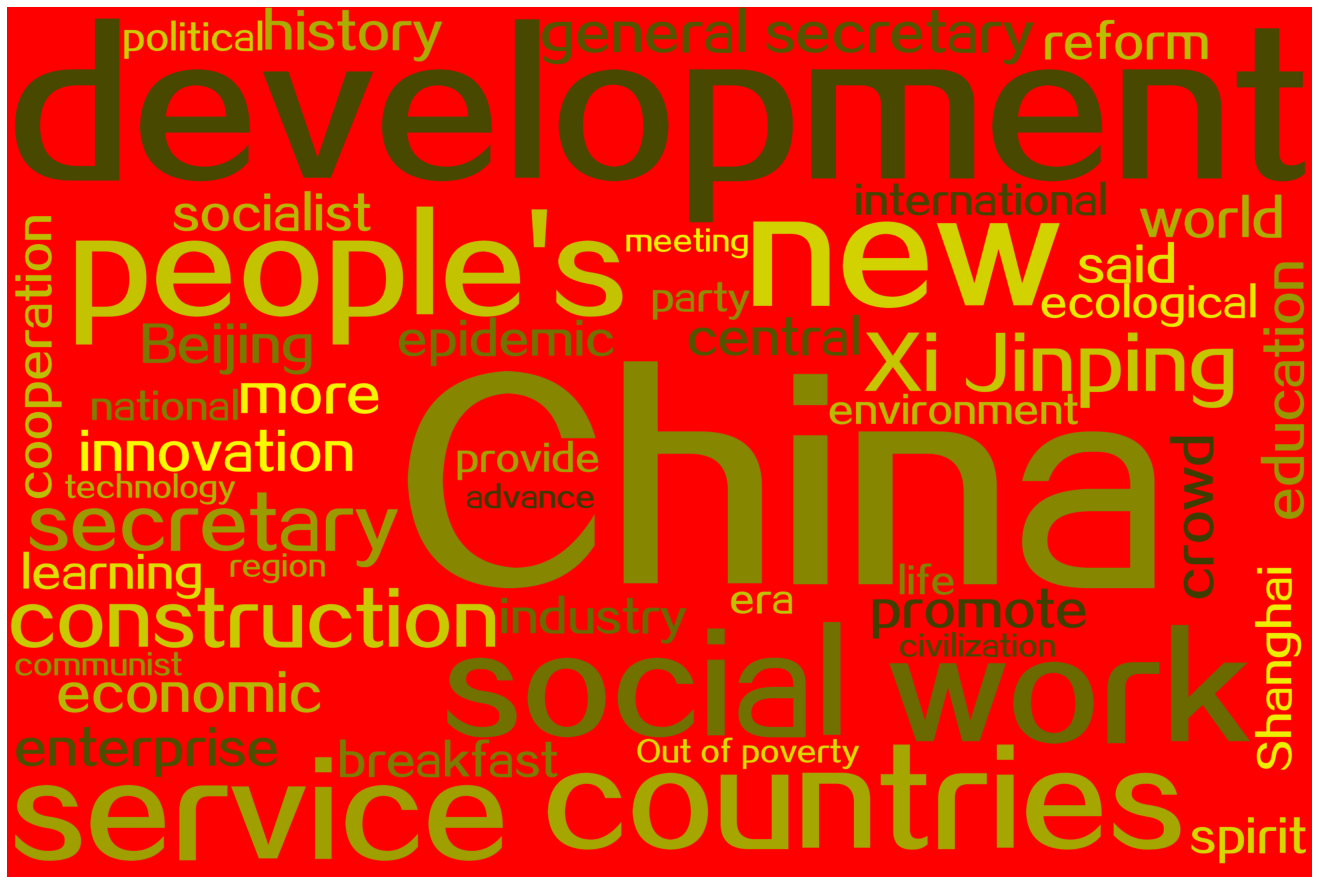

In [26]:
wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(En_word_count)

wc.to_file("People's Daily WordCloud English.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud English.png"))
plt.axis("off")
plt.show()

## 3. mix English and Chinese and generate WordCloud

In [27]:
from random import choice
Rand_word_count={}
for word in word_ds.head(50).index:
    if choice(['En','Zh']) == 'En':
        Rand_word_count[removeElse(translator(word))]=word_count[word]
    else:
        Rand_word_count[word]=word_count[word]
        
Rand_word_ds=pd.DataFrame(Rand_word_count,index=[0])
Rand_word_ds=Rand_word_ds.T
Rand_word_ds.columns=['count']

Rand_word_ds.sort_values(by=['count'],ascending=False,inplace=True)
Rand_word_ds.head(20)

,count
China,410
development,393
new,214
work,193
社会,181
countries,168
people's,164
服务,163
construction,153
Xi Jinping,151


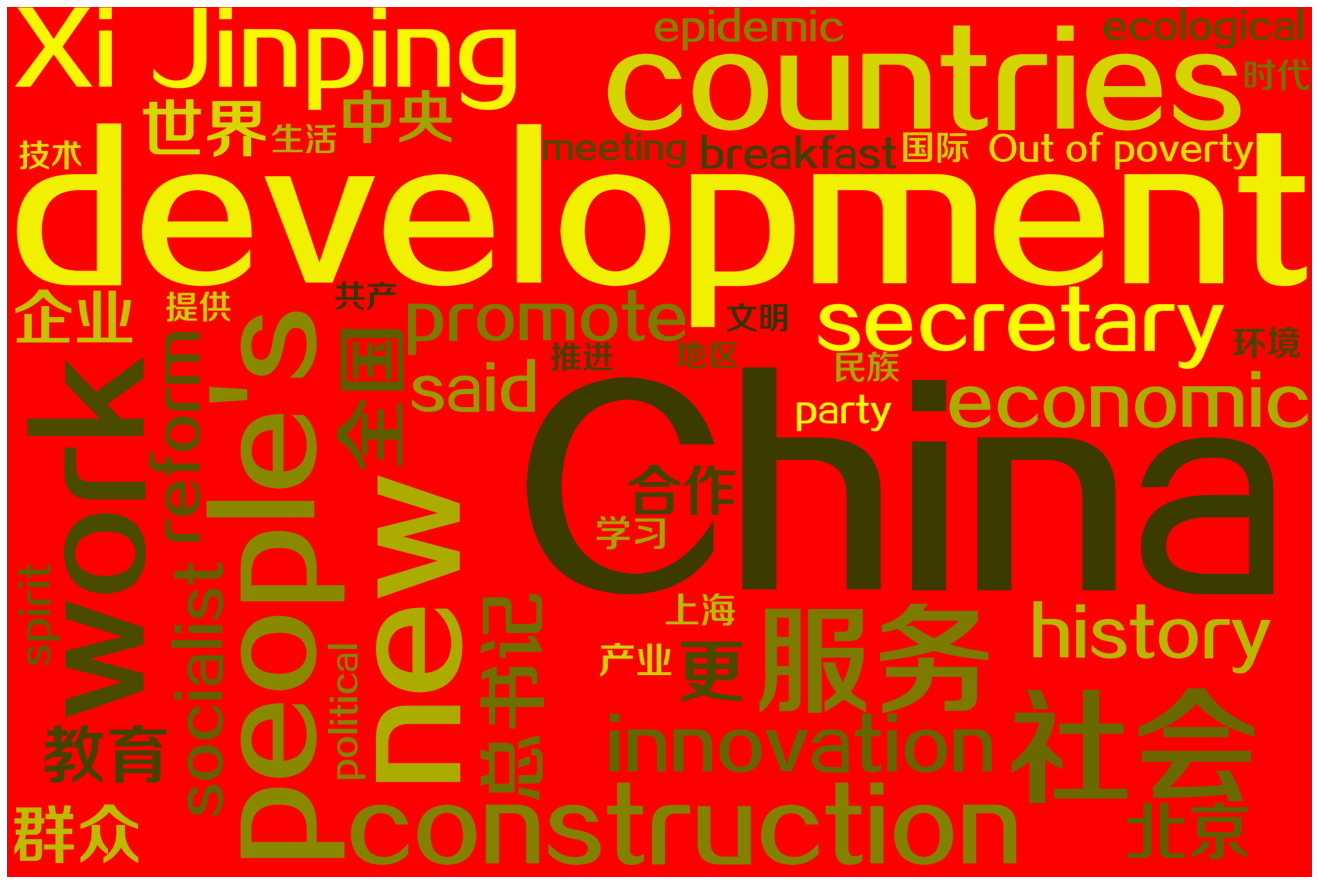

In [28]:
wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(Rand_word_count)

wc.to_file("People's Daily WordCloud Zh and En.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud Zh and En.png"))
plt.axis("off")
plt.show()